<a href="https://colab.research.google.com/github/jrakhshanda55/Ausaf_ML/blob/main/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Disease Prediction: A Multivariate Analysis

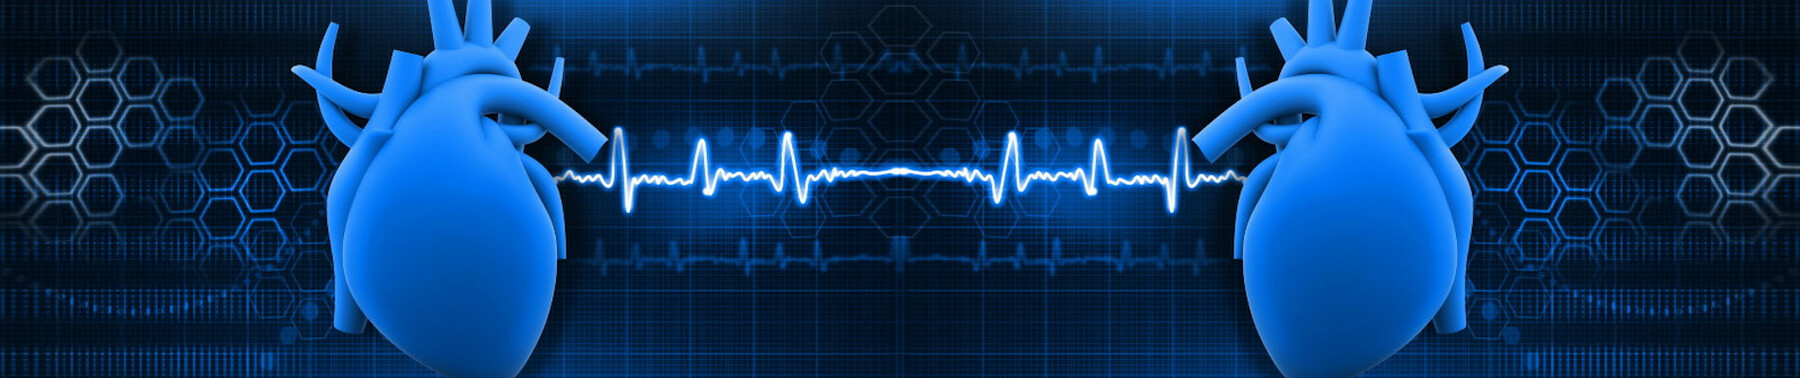

## 1. Introduction

Cardiovascular diseases (CVDs) remain the leading global cause of mortality, claiming approximately 17.9 million lives annually—constituting 31% of all deaths worldwide. Four out of five CVD-related fatalities result from heart attacks and strokes, with one-third occurring prematurely in individuals under 70 years of age. Heart failure, a common consequence of CVDs, emphasizes the urgency for early detection and management.

Individuals affected by CVDs or at high risk—due to factors such as hypertension, diabetes, hyperlipidemia, or existing diseases—require timely identification and intervention. In this context, the application of machine learning models proves instrumental.

This project aims to leverage supervised machine learning methodologies of classification to predict the presence of heart disease based on patient attributes. The exploration goes beyond predictive modeling; it extends to extracting meaningful insights from the dataset. Through a comprehensive analysis, we aim to identify key correlations and factors influencing heart health. This dual-purpose approach not only enhances our predictive capabilities but also contributes to a deeper understanding of the dynamics associated with cardiovascular health.

### 1.1 Objective

The primary objectives of this analysis are twofold. The first goal involves an exploratory data analysis, aiming to derive meaningful insights and diagnostic correlations from the dataset. By leveraging statistical and machine learning techniques, the intention is to unravel patterns that could enhance our understanding of cardiovascular health, potentially leading to more effective diagnostic procedures and preventive measures.

The second objective is to develop a machine learning model capable of predicting the likelihood of heart disease based on the provided attributes. This task involves applying classification algorithms to discern patterns and relationships within the dataset, contributing to the broader field of medical diagnostics.


# 2. Dataset
The Heart Disease UCI dataset, presenting a diverse array of attributes related to cardiovascular health, stands out as a valuable resource for exploration. Widely recognized in the machine learning community, this dataset comprises 11 attributes, each providing valuable insights into the cardiovascular health of patients. These attributes include age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak (ST depression induced by exercise relative to rest), and the slope of the peak exercise ST segment.

**Column Descriptions:**
- Age: age of the patient in years
- Sex: sex of the patient (M: Male, F: Female)
- ChestPainType: chest pain type (TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic)
  - Typical Angina: This type of chest pain is typically associated with myocardial ischemia which indicates insufficient blood flow to the heart muscle.
  - Atypical Angina: Atypical angina refers to chest pain that does not fit the typical characteristics of angina and it is less predictable.
  - Non-Anginal Pain: This chest pain is chest discomfort that is not related to myocardial ischemia. It may have various causes, such as musculoskeletal issues, gastrointestinal problems, or anxiety.
  - Asymptomatic: This indicates the absence of chest pain or discomfort. Individuals classified as asymptomatic do not report chest pain during the study.
- RestingBP: resting blood pressure (mm Hg)
- Cholesterol: serum cholesterol (mm/dl)
- FastingBS: fasting blood sugar (1: if FastingBS > 120 mg/dl, 0: otherwise)
- RestingECG: resting electrocardiogram (ECG) results (Normal: Normal, ST: having - ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria9
- MaxHR: maximum heart rate achieved 8 numeric value between 60 and 202)
- ExerciseAngina: exercise-induced angina (Y: Yes, N: No)
- Oldpeak: oldpeak = ST depression induced by exercise relative to rest where ST depression is a numerical measure of abnormality in the ECG waveforms.
- ST_Slope: the slope of the peak exercise ST segment (Up: upsloppind, Falt: flat, Down: downsloping).
  - Upsloping:  If the slope is upward, it suggests a better prognosis.
  - Flat: A flat slope may be considered intermediate in terms of prognosis.
  - Downsloping: A downward slope may indicate a higher likelihood of coronary artery disease.
- HeartDisease: Response Variable (1: heart disease, 0: Normal)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,mean_absolute_error,mean_squared_error

from IPython.display import Image
from IPython.core.display import HTML
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

In [4]:
data = pd.read_csv('/content/heart.csv')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


# 3. Exploratory Data Analysis (EDA)

In [6]:
# description of patients numerical data with no heart Disease
data[data['HeartDisease']==0].describe().T.style.background_gradient(subset=['mean','std','50%','count'])

,count,mean,std,min,25%,50%,75%,max
Age,410.000000,50.551220,9.444915,28.000000,43.000000,51.000000,57.000000,76.000000
RestingBP,410.000000,130.180488,16.499585,80.000000,120.000000,130.000000,140.000000,190.000000
Cholesterol,410.000000,227.121951,74.634659,0.000000,197.250000,227.000000,266.750000,564.000000
FastingBS,410.000000,0.107317,0.309894,0.000000,0.000000,0.000000,0.000000,1.000000
MaxHR,410.000000,148.151220,23.288067,69.000000,134.000000,150.000000,165.000000,202.000000
Oldpeak,410.000000,0.408049,0.699709,-1.100000,0.000000,0.000000,0.600000,4.200000
HeartDisease,410.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [7]:
# description of patients numerical with heart Disease
data[data['HeartDisease']==1].describe().T.style.background_gradient(subset=['mean','std','50%','count'])

,count,mean,std,min,25%,50%,75%,max
Age,508.000000,55.899606,8.727056,31.000000,51.000000,57.000000,62.000000,77.000000
RestingBP,508.000000,134.185039,19.828685,0.000000,120.000000,132.000000,145.000000,200.000000
Cholesterol,508.000000,175.940945,126.391398,0.000000,0.000000,217.000000,267.000000,603.000000
FastingBS,508.000000,0.334646,0.472332,0.000000,0.000000,0.000000,1.000000,1.000000
MaxHR,508.000000,127.655512,23.386923,60.000000,112.000000,126.000000,144.250000,195.000000
Oldpeak,508.000000,1.274213,1.151872,-2.600000,0.000000,1.200000,2.000000,6.200000
HeartDisease,508.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
# checking for NA values
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

We do not have any null values in the dataset.

## 3.1. Outliers in Data

Outliers in the context of supervised machine learning refer to unusual or extreme values in the dataset that is far away from other values of the dataset. These values have the potential to disrupt statistical analysis and violate the assumptions of the models. Dealing with outliers is a common challenge for analysts, and decisions need to be made on how to handle them.

Deciding to remove outliers from a dataset should be based on specific reasons, not a general inclination for cleanliness. Understanding the impact of outliers on analysis and recognizing their potential value or genuine variability is crucial. Therefore, analysts must carefully evaluate the context and implications before deciding to remove outliers. We can use the following [flow chart](https://www.statology.org/remove-outliers/) to help us decide whether we should remove an outlier or not.

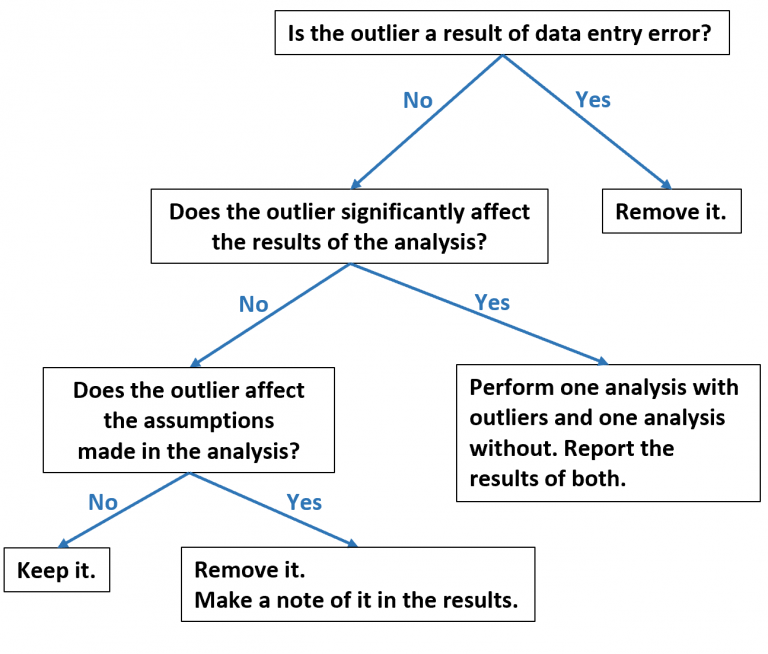

In [9]:
Image("/content/removeOutlier1.png", width=500, height=500)

In this project we are using the inter qualtile range (IQR) method to detect the outliers. It involves looking at the range where most of data point lies, which is the median 50% of the values. The IQR works in the following manner:
Calculate the Interquartile Range (IQR):

- **Find the median (middle value) of data**
  - Split the data into two halves: the lower half (values below the median) and the upper half (values above the median).
  - Find the median of each half. These are the first quartile ($Q_1$) and third quartile ($Q_3$).
  - Calculate the IQR by subtracting Q1 from Q3.
- **Identify Potential Outliers:**
  - Any data point $x$ such that, $(Q_1 - 1.5) * IQR < x <(Q_3 + 1.5) * IQR$ is considered a potential outlier.


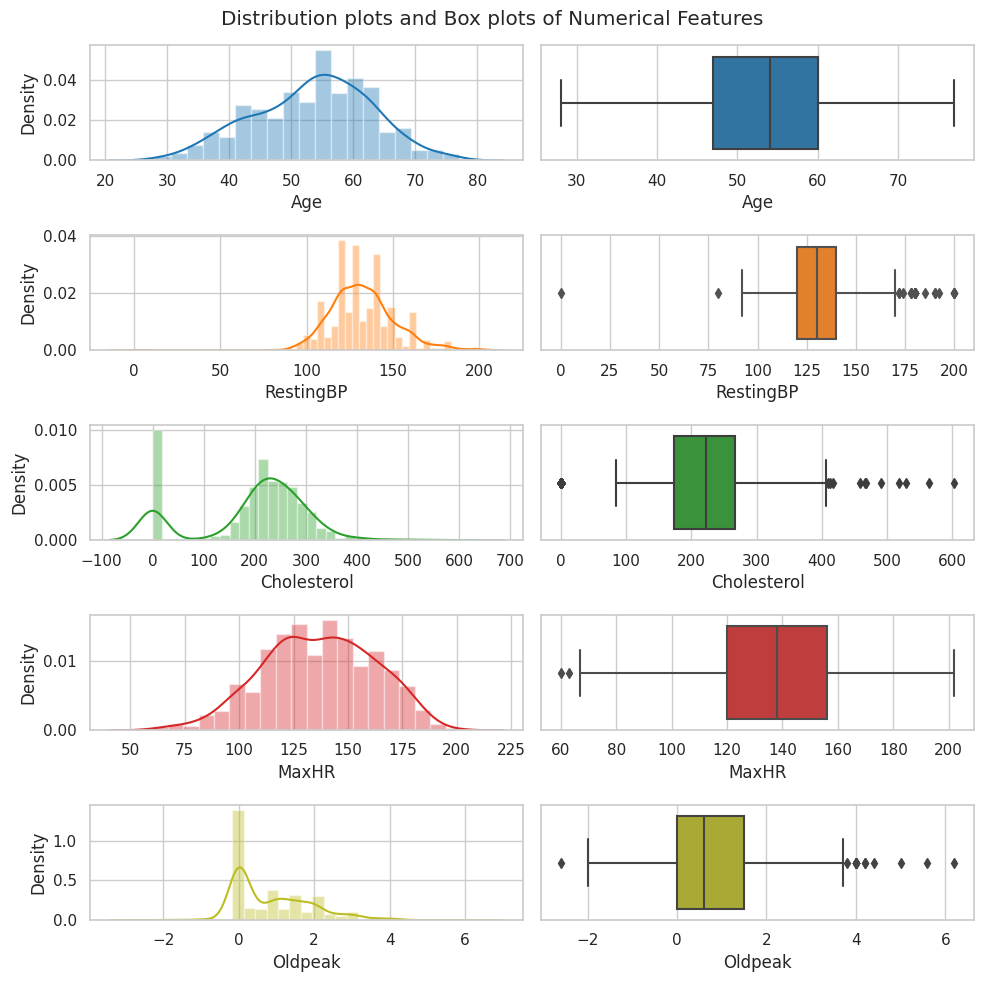

In [10]:
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:olive']

plt.figure(figsize=(10, 10))
for i, feature in enumerate(numerical_features, start=1):
    plt.subplot(5, 2, i * 2 - 1)
    sns.distplot(data[feature], color=colors[i - 1])

    plt.subplot(5, 2, i * 2)
    sns.boxplot(x=data[feature], color=colors[i - 1],whis=1.5)

plt.suptitle('Distribution plots and Box plots of Numerical Features')
plt.tight_layout()
plt.show()


Considering the above plot, we can observe that the age feature of patients follows a relatively normal distribution and does not exhibit any outliers. However, other numerical features appear to show the presence of outliers in the data.

For instance the resting blood pressure of any human cannot be 0 mm Hg. Similarly cholestrol level of humans 0 mm/dl is also not pysiologically possible. so we can see clear outliers caused by wrong entry of data in RestingBP and Cholestrol feature.

In the following code we will use IQR method to remove outliers from our dataset.

In [11]:
Q1 = data.quantile(0.05)
Q3 = data.quantile(0.95)
IQR = Q3 - Q1
IQR.sort_values(ascending=False)

Cholesterol     331.3
MaxHR            82.0
RestingBP        54.0
Age              31.0
Oldpeak           3.0
FastingBS         1.0
HeartDisease      1.0
dtype: float64

In [12]:
df = data [~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(917, 12)

In [100]:
print(len(df[df.RestingBP==0]))

0


We can see that only one observation is removed from the original dataset using the IQR method, specifically the observation where the RestingBP feature takes a value of 0. Since no human body can have 0 mg/dL cholesterol, we will now check the number of observations in our dataset that have 0 mg/dL cholesterol and try to infer suitable substitute values for such observations to make this dataset closer to real-world scenarios.

In [101]:
len(df[df.Cholesterol==0])

171

In [13]:
## Converting Zero Value of Cholesterol to NaN Value
df.loc[df['Cholesterol'] == 0,'Cholesterol'] = np.nan
## NaN value of Cholesterol is filled with median value
df["Cholesterol"] = df["Cholesterol"].fillna(df["Cholesterol"].mean())

### 3.1.1 Analysis of Patients Resting Blood Pressure (BP)
A total blood pressure (BP) reading is determined by measuring the systolic and diastolic blood pressures.

- Systolic pressure is the maximum blood pressure during the contraction of the ventricles.
- Diastolic pressure is the minimum pressure recorded just prior to the next contraction.

BP is typically written as the systolic pressure over the diastolic pressure (e.g., 120/80 mm Hg) ([Walker et al., 1990](https://www.ncbi.nlm.nih.gov/books/NBK268/#:~:text=Systolic%20pressure%20is%20the%20maximum,120%2F80%20mm%20Hg)). The following image shows the blodd pressure chart for a clear understading of the ranges of systoloc and diastolic BP.

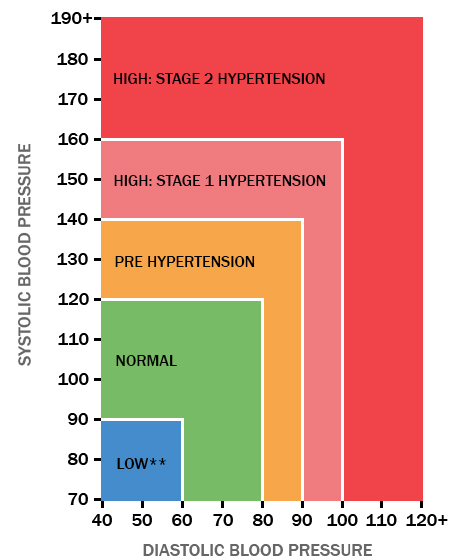

In [14]:
Image("/content/bp-range-chart.jpg", width=500, height=550)

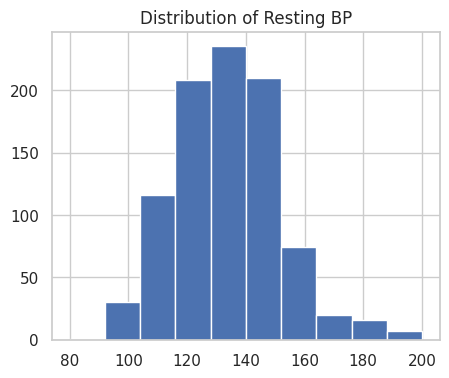

In [15]:
df.RestingBP.hist(figsize=(5,4))
plt.title('Distribution of Resting BP')
plt.show()

In [16]:
systolicBP = df[df['RestingBP'] >= 100]
print(systolicBP.shape)
diastolicBP = df[df['RestingBP'] <= 100]
print(diastolicBP.shape)

(905, 12)
(27, 12)


In [106]:
print(f"Minimum BP reported in dataset is: {df.RestingBP.min()} mm HG")
print(f"Maximum BP reported in dataset is: {df.RestingBP.max()} mm HG")

Minimum BP reported in dataset is: 80 mm HG
Maximum BP reported in dataset is: 200 mm HG


From this dataset, we can infer that the resting BP data is highly imbalanced because for each patient, both systolic and diastolic BP are measured at the same time. So, we can assume that the RestingBP dataset only represents systolic blood pressure. Thus we will create another boolean column for diastoloc BP if RestingBP values is less than or equal to 100.

In [17]:
df['DiastolicBP'] = np.where(df['RestingBP'] <=100,'Y','N' )
df.sample(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,DiastolicBP
871,61,M,NAP,150,243.0,1,Normal,137,Y,1.0,Flat,0,N
248,45,M,ASY,130,219.0,0,ST,130,Y,1.0,Flat,1,N
117,59,F,ASY,130,338.0,1,ST,130,Y,1.5,Flat,1,N
519,63,M,ASY,96,305.0,0,ST,121,Y,1.0,Up,1,Y
517,65,M,ASY,150,235.0,0,Normal,120,Y,1.5,Flat,1,N


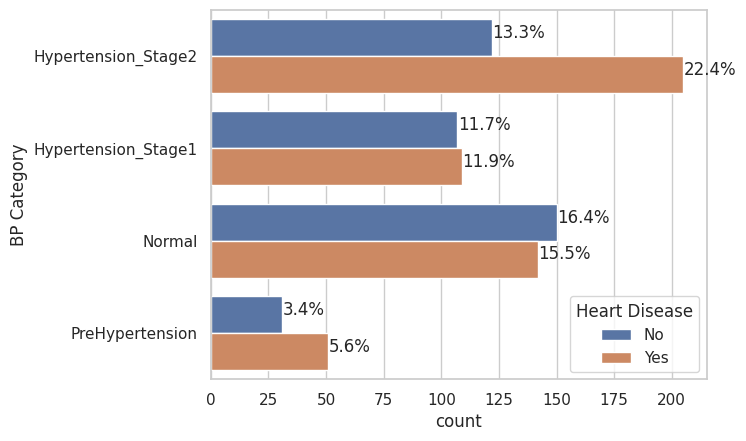

In [18]:
df["BP_Category"]= pd.cut(df["RestingBP"] ,bins=[0,120, 129 , 139,200] ,labels=["Normal","PreHypertension","Hypertension_Stage1", "Hypertension_Stage2"] )
df["BP_Category"] = df["BP_Category"].astype('object')

ax = sns.countplot(y='BP_Category', data=df, hue='HeartDisease', dodge=True)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width() / len(df))
    x = p.get_x() + p.get_width() + 0.1  # Adjusted x-coordinate
    y = p.get_y() + p.get_height() / 2
    ax.annotate(percentage, (x, y), fontsize=12)
ax.legend(labels=['No', 'Yes'], title='Heart Disease')
plt.ylabel('BP Category')
plt.show()

### 3.2.2. Analysis of Patients Cholestrol Level
Total cholesterol level in human body is the overall amount of cholesterol found in your blood. It consists of:

- Low-density lipoproteins (LDLs): It is also called "bad" cholesterol because it blocks your blood vessels and increases your risk for heart disease.
- High-density lipoproteins (HDLs): It is considered "good" cholesterol because it helps protect you from heart disease. The higher your HDL, the better.
- Triglycerides: Total cholesterol also includes a triglyceride count. These are another type of fat that can build up in the body and are considered the "building blocks" of cholesterol ([Goodwin, 2021](https://www.healthline.com/health/high-cholesterol/levels-by-age)).

Following are the acceptable, borderline, and high measurements for adults. All values are in mg/dL (milligrams per deciliter) and are based on fasting measurements.

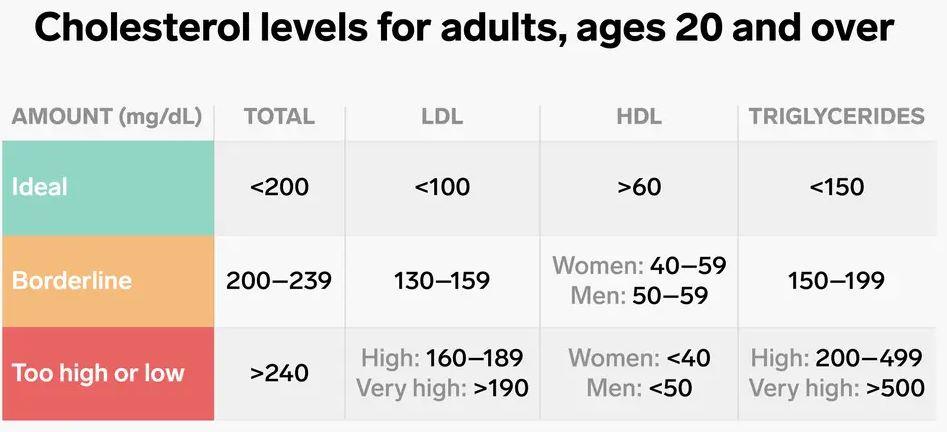

In [109]:
Image("/content/cholestrol_chart.JPG",width=700)

Based on the above shown chart we will create another column in the datset to recoed the cholestrol level in the patients.

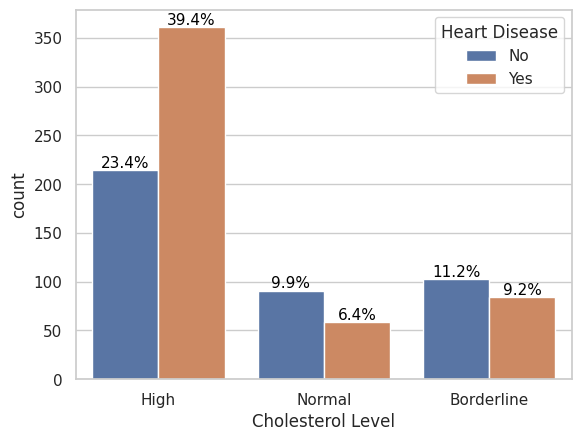

In [20]:
df["CholesterolLevel"]= pd.cut(df["Cholesterol"] ,bins=[0, 200, 230 , 500] ,labels=["Normal","Borderline","High" ])
df["CholesterolLevel"] = df["CholesterolLevel"].astype('object')

ax = sns.countplot(x='CholesterolLevel', data=df, hue='HeartDisease', dodge=True)
ax.tick_params(rotation=0)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{100 * height / len(df):.1f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), textcoords='offset points')
plt.xlabel('Cholesterol Level')
ax.legend(labels=['No', 'Yes'], title='Heart Disease')

plt.show()

## 3.2 Correlation of Predictors with Response Variable

In [21]:
pd.DataFrame(abs(df.corr()['HeartDisease']))

,HeartDisease
Age,0.282012
RestingBP,0.117990
Cholesterol,0.094113
FastingBS,0.267994
MaxHR,0.401410
Oldpeak,0.403638
HeartDisease,1.000000


#### Correlation of Numerical Features with Response Variable

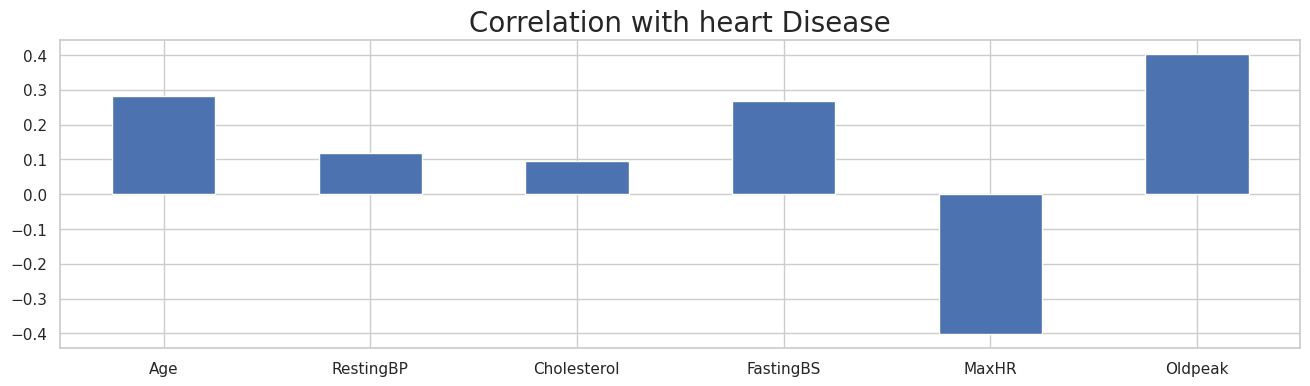

In [22]:
#Correlation with Response Variable class
X = df.drop(['HeartDisease'], axis=1)
y = df['HeartDisease']
X.corrwith(y).plot.bar(figsize=(16, 4), rot=90, grid=True)
plt.title('Correlation with heart Disease',fontsize=20)
plt.xticks(rotation=0)
plt.show()


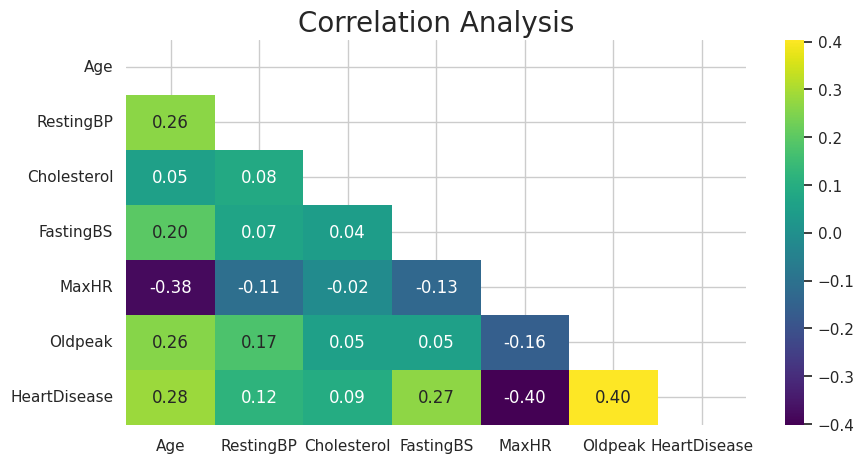

In [26]:
correlation_matrix = df.corr()

plt.figure(figsize=(10,5))
plt.title('Correlation Analysis',fontsize=20,)
sns.heatmap(correlation_matrix, mask= np.triu(np.ones_like(correlation_matrix, dtype=bool)),annot=True,lw=0,linecolor='white',cmap='viridis',fmt="0.2f")
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.show()

From the above correlation plot and heatmap, we can infer that Age, Resting BP, Cholesterol, Fasting blood sugar, and Oldpeak (ST depression induced by exercise relative to rest) are positively correlated with heart disease in patients, with the Oldpeak feature exhibiting the strongest positive correlation. This suggests that an increase in the numeric value of these features corresponds to an increase in the heart disease ratio.

In contrast, the MaxHR (maximum heart rate) feature exhibits a strong negative correlation with the response variable, indicating that a higher value of MaxHR leads to a decrease in the heart disease ratio.

On the other hand, considering multicollinearity between independent variables (predictors), it is not very strong. For instance, the Age of the patients shows the maximum positive correlation with RestingBP and Oldpeak, which is 0.26.

**Scatter Matrix plot of Numerical Predictors (Features)**

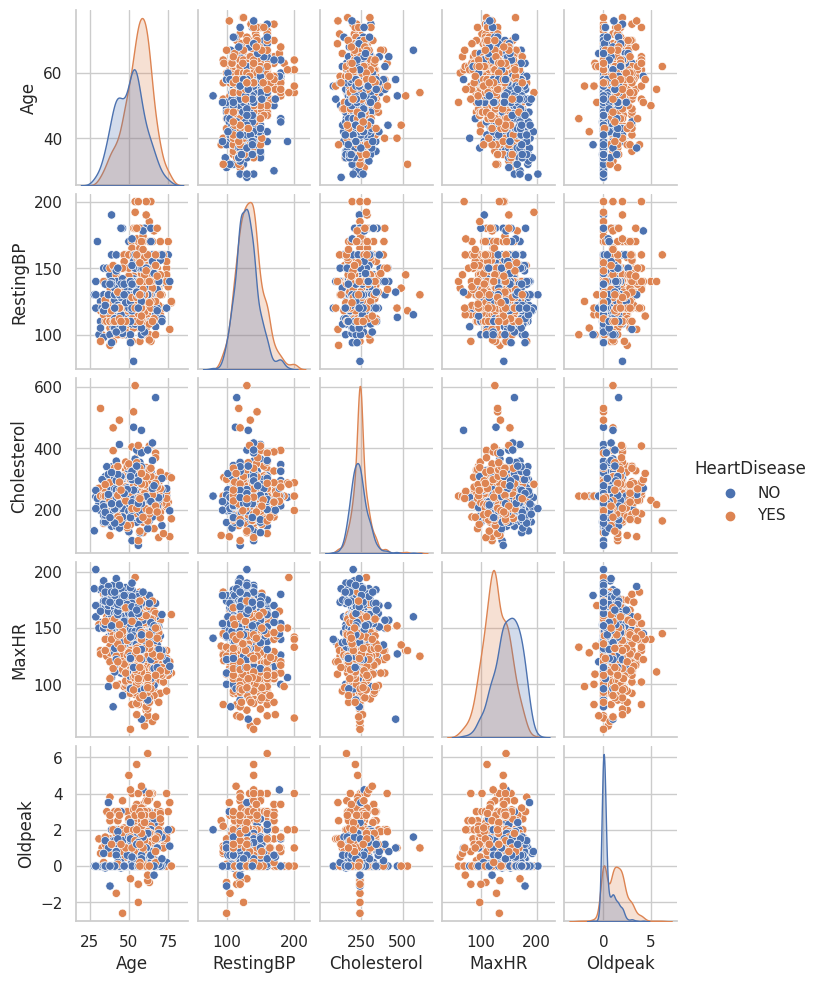

In [127]:
dff = df.copy()
dff['HeartDisease'] = dff['HeartDisease'].replace({0: 'NO', 1: 'YES'})
numerical_features = dff[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak','HeartDisease']]
sns.pairplot(numerical_features, hue="HeartDisease",height=2,aspect=0.7)
plt.show()

#### Count Plots of Categorical Features According to Response Variable

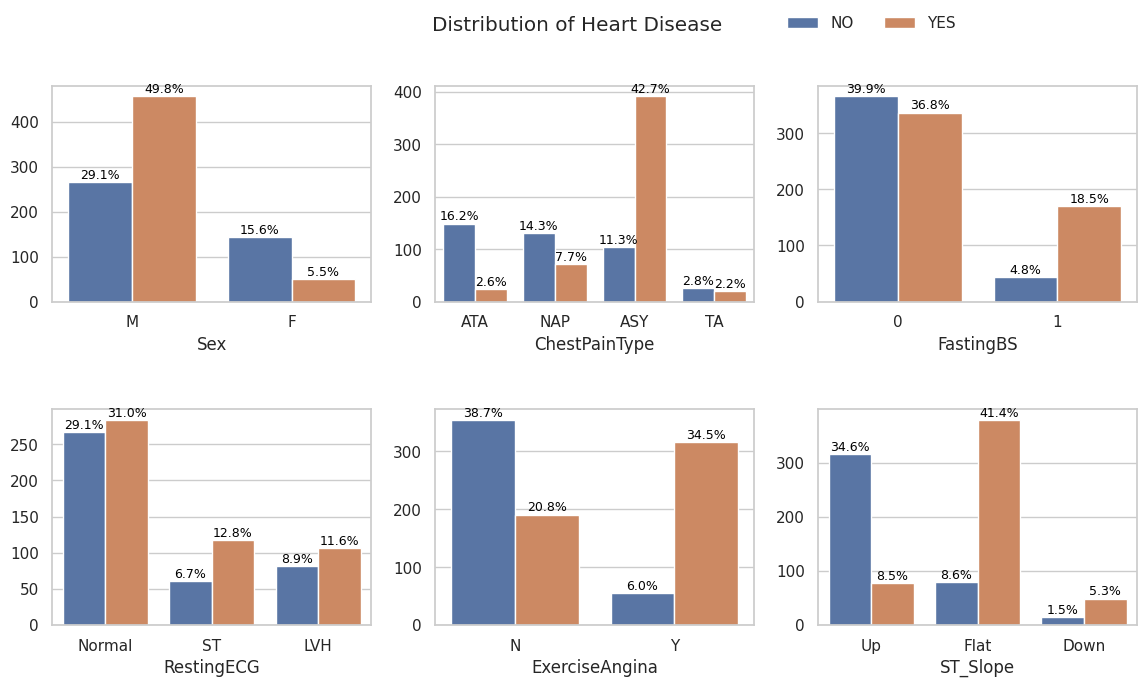

In [141]:
categorical_features = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
fig, axes = plt.subplots(2, 3, figsize=(14, 7), gridspec_kw={'hspace': 0.5})
axes = axes.flatten()
for ax, col in zip(axes, categorical_features):
    sns.countplot(x=col, data=dff, hue='HeartDisease', dodge=True, ax=ax)
    ax.get_legend().remove()
    ax.set(ylabel='')

    # Add percentages on top of each bar
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{100 * height / len(dff[col]):.1f}%', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                    textcoords='offset points')

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', ncol=3, bbox_to_anchor=(0.78, 1), frameon=False)
fig.suptitle('Distribution of Heart Disease')
plt.show()

## 3.3. Comparison of Men and Women Regarding CVDs

In [115]:
print(f"Percentage of women with probability of HeartDisease: {df.loc[df['Sex'] == 'F']['HeartDisease'].mean() *100:.0f}%")
print(f"Percentage of men with probability of HeartDisease: {df.loc[df['Sex'] == 'M']['HeartDisease'].mean() *100:.0f}%")

Percentage of women with probability of HeartDisease: 26%
Percentage of men with probability of HeartDisease: 63%


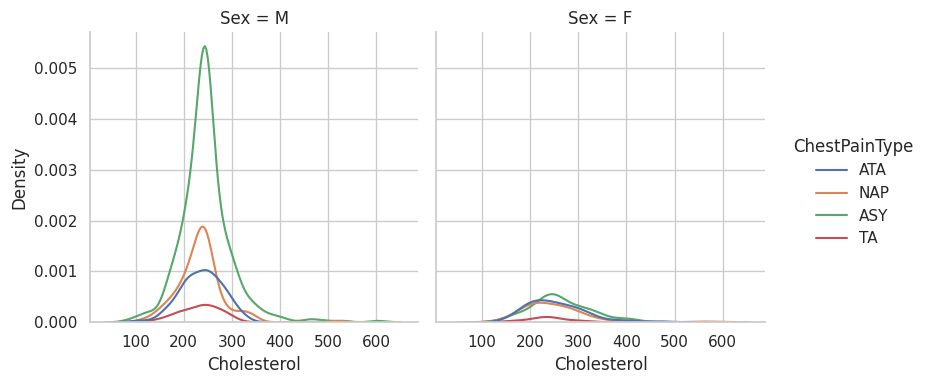

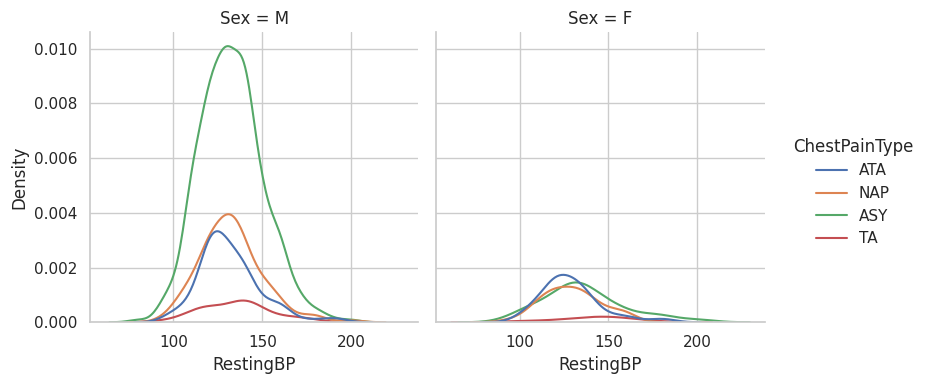

In [89]:
sns.displot(data=df, x="Cholesterol", hue="ChestPainType", col="Sex", kind="kde",height=4)
sns.displot(data=df, x="RestingBP", hue="ChestPainType", col="Sex", kind="kde",height=4)
plt.show()

### 3.4. Class Distribution Analysis
The distribution of the Response class shown in the following figure, represents the presence or absence of heart disease, is balanced, with approximately 55.3% of the patients that has the CVD and 44.7% does not have the dissease. This balance ensures that the dataset provides a fair representation of both outcomes, allowing the machine learning model to learn patterns associated with both positive and negative instances of heart disease.

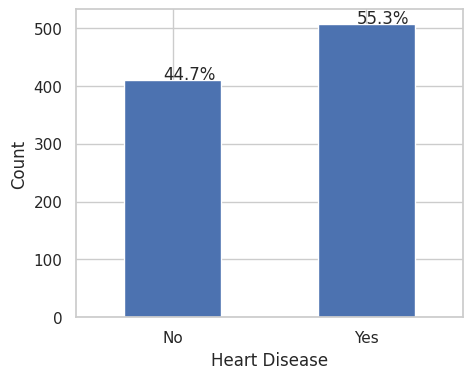

In [191]:
plt.figure(figsize=(5, 4))
ax = df['HeartDisease'].value_counts().sort_index().plot(kind='bar')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / len(df))
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_height() + 1
    ax.annotate(percentage, (x, y), fontsize=12)

plt.xticks(ticks=[0, 1],labels=['No', 'Yes'],rotation=0)
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.show()


# 4. Methodology